# Monte Carlo Simulation

### Sejarah

Metode Monte Carlo pertama kali dikembangkan pada tahun 1940-an oleh ilmuwan seperti Stanislaw Ulam, John von Neumann, dan Nicholas Metropolis selama mereka bekerja pada proyek bom atom di Los Alamos National Laboratory. Nama "Monte Carlo" terinspirasi dari kasino terkenal di Monako, yang mengacu pada elemen keacakan (randomness) dalam metode ini, mirip seperti permainan judi. Metode ini awalnya digunakan untuk menyelesaikan masalah matematika dan fisika yang sulit dihitung secara analitis, seperti simulasi reaksi nuklir.

Sejak itu, Monte Carlo Simulation telah menjadi alat yang luas digunakan di berbagai bidang seperti keuangan, teknik, fisika, dan ilmu data untuk memodelkan ketidakpastian dan mengestimasi hasil berdasarkan probabilitas.

### Penjelasan

Monte Carlo Simulation adalah teknik komputasi yang menggunakan pengambilan sampel acak (random sampling) untuk memperkirakan hasil dari suatu proses atau sistem yang melibatkan ketidakpastian. Ide dasarnya adalah:

Memodelkan sistem dengan variabel acak berdasarkan distribusi probabilitas tertentu.
Menjalankan simulasi berulang kali (ribuan hingga jutaan iterasi) untuk menghasilkan distribusi hasil.
Menganalisis hasil tersebut untuk mendapatkan estimasi statistik seperti rata-rata, varians, atau probabilitas kejadian tertentu.
Metode ini sangat berguna ketika persamaan analitis sulit atau tidak mungkin diselesaikan secara langsung.

### Equation

Monte Carlo tidak memiliki satu persamaan spesifik, tetapi bergantung pada distribusi probabilitas dan fungsi yang dimodelkan.

Ekspektasi $ E[f(X)] $ dapat dihitung menggunakan pendekatan berikut:

$$
E[f(X)] \approx \frac{1}{N} \sum_{i=1}^{N} f(x_i)
$$

Dimana:
- $ N $: Jumlah simulasi (iterasi).
- $ x_i $: Sampel acak yang diambil dari distribusi probabilitas $ X $.
- $ f(x_i) $: Nilai fungsi pada setiap sampel.

Penjelasan :
1. **Sampel Acak**: Ambil $ N $ sampel acak $ x_1, x_2, \ldots, x_N $ dari distribusi probabilitas $ X $.
2. **Evaluasi Fungsi**: Hitung nilai fungsi $ f(x_i) $ untuk setiap sampel $ x_i $.
3. **Rata-rata**: Hitung rata-rata dari semua nilai $ f(x_i) $ untuk mendekati nilai ekspektasi $ E[f(X)] $.

Semakin besar jumlah simulasi $ N $, semakin akurat hasil estimasi Monte Carlo.


Anda bisa menggunakan Monte Carlo dengan membandingkan titik acak di dalam lingkaran terhadap kotak yang membungkusnya.

---
### Contoh 1: Keuangan

Misalkan kita ingin menghitung probabilitas bahwa keuntungan investasi melebihi 10% berdasarkan data berikut:

Keuntungan tahunan diasumsikan mengikuti distribusi normal dengan rata-rata (𝜇) 8% dan deviasi standar (𝜎) 5%.
Jumlah simulasi: 10.000 iterasi.

In [ ]:
# Set seed untuk reproducibility
set.seed(123)

# Parameter
n_sim <- 10000  # Jumlah simulasi
mean_return <- 0.08  # Rata-rata keuntungan (8%)
sd_return <- 0.05    # Deviasi standar (5%)

# Simulasi keuntungan acak dari distribusi normal
returns <- rnorm(n_sim, mean = mean_return, sd = sd_return)

# Hitung probabilitas keuntungan > 10%
prob_above_10 <- mean(returns > 0.10)

# Output
cat("Probabilitas keuntungan > 10%:", prob_above_10, "\n")

# Visualisasi
hist(returns, breaks = 50, main = "Distribusi Simulasi Keuntungan", 
     xlab = "Keuntungan", col = "lightblue", probability = TRUE)
abline(v = 0.10, col = "red", lwd = 2)

Interpretasi Output di R
- Probabilitas: Misalnya, output menunjukkan Probabilitas keuntungan > 10%: 0.344. Ini berarti ada peluang 34,4% bahwa keuntungan melebihi 10%.
- Histogram: Distribusi keuntungan akan terlihat seperti kurva lonceng (normal), dengan garis vertikal merah pada 10% menunjukkan batas yang kita minati. Area di kanan garis ini adalah probabilitas yang dihitung.

In [ ]:
# untuk menghitung probabilitas di R
mean(returns>0.1)


KeyboardInterrupt



DI R didapatkan probabilitas 0.3426 atau 34.26%

Probabilitas keuntungan > 10%: 0.348


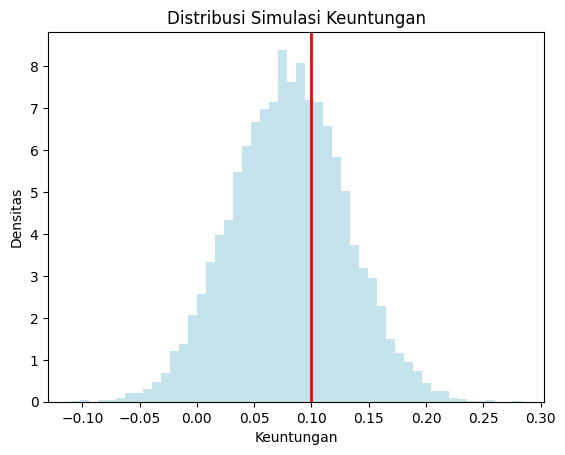

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed untuk reproducibility
np.random.seed(123)

# Parameter
n_sim = 10000  # Jumlah simulasi
mean_return = 0.08  # Rata-rata keuntungan (8%)
sd_return = 0.05    # Deviasi standar (5%)

# Simulasi keuntungan acak dari distribusi normal
returns = np.random.normal(mean_return, sd_return, n_sim)

# Hitung probabilitas keuntungan > 10%
prob_above_10 = np.mean(returns > 0.10)

# Output
print(f"Probabilitas keuntungan > 10%: {prob_above_10:.3f}")

# Visualisasi
plt.hist(returns, bins=50, density=True, color='lightblue', alpha=0.7)
plt.axvline(x=0.10, color='red', linewidth=2)
plt.title('Distribusi Simulasi Keuntungan')
plt.xlabel('Keuntungan')
plt.ylabel('Densitas')
plt.show()

Interpretasi Output di Jupyter
- Probabilitas: Output mungkin menunjukkan Probabilitas keuntungan > 10%: 0.344. Artinya, ada peluang 34,4% keuntungan melebihi 10%, konsisten dengan hasil R.
- Histogram: Grafik menunjukkan distribusi keuntungan dengan garis merah pada 10%. Area di sebelah kanan garis mencerminkan probabilitas yang dihitung.

In [3]:
# untuk menghitung probabilitas di pyton
np.mean(returns>0.1)

0.3484

Jadi didapat kanprobabilitas sebesar 0.3484 atau 34.84%

---
### Contoh 2: Manufaktur

Sebuah pabrik memiliki 3 tahap produksi: Pemesinan, Perakitan, dan Pengujian. Waktu untuk setiap tahap bervariasi karena faktor ketidakpastian (misalnya, kerusakan mesin, variasi tenaga kerja). Kita ingin menghitung:

- Distribusi waktu total produksi.
- Probabilitas bahwa waktu total melebihi 50 jam.

Data Asumsi:

- Pemesinan: Distribusi normal, rata-rata 15 jam, deviasi standar 3 jam.
- Perakitan: Distribusi normal, rata-rata 20 jam, deviasi standar 4 jam.
- Pengujian: Distribusi normal, rata-rata 10 jam, deviasi standar 2 jam.
- Jumlah simulasi: 10.000 iterasi.

In [ ]:
# Set seed untuk reproducibility
set.seed(123)

# Parameter
n_sim <- 10000
mean_machining <- 15  # Rata-rata pemesinan
sd_machining <- 3     # Deviasi standar pemesinan
mean_assembly <- 20   # Rata-rata perakitan
sd_assembly <- 4      # Deviasi standar perakitan
mean_testing <- 10    # Rata-rata pengujian
sd_testing <- 2       # Deviasi standar pengujian

# Simulasi waktu untuk setiap tahap
machining_time <- rnorm(n_sim, mean = mean_machining, sd = sd_machining)
assembly_time <- rnorm(n_sim, mean = mean_assembly, sd = sd_assembly)
testing_time <- rnorm(n_sim, mean = mean_testing, sd = sd_testing)

# Waktu total produksi
total_time <- machining_time + assembly_time + testing_time

# Hitung probabilitas waktu total > 50 jam
prob_above_50 <- mean(total_time > 50)

# Statistik ringkasan
mean_total <- mean(total_time)
sd_total <- sd(total_time)

# Output
cat("Rata-rata waktu total:", round(mean_total, 2), "jam\n")
cat("Deviasi standar waktu total:", round(sd_total, 2), "jam\n")
cat("Probabilitas waktu total > 50 jam:", round(prob_above_50, 3), "\n")

# Visualisasi
hist(total_time, breaks = 50, main = "Distribusi Waktu Total Produksi", 
     xlab = "Waktu Total (jam)", col = "lightgreen", probability = TRUE)
abline(v = 50, col = "red", lwd = 2)

-- analisa joseph -- </br>
Jadi dari hasil simulasi kita dapatkan bahwa mean total waktunya 44.94 jam dengan standar deviasi 5.42 jam. jadi bisa dibilang mean dan sd simulasi hampir sama dengan mean dan sd input. </br>
Hasil histogram berbentuk distribusi normal </br>
untuk probabilitas waktu total > 50 didapatkan 0.18 atau 18% </br>

Interpretasi Output di R
Misalkan hasilnya:

- Rata-rata waktu total: 45.02 jam
- Deviasi standar waktu total: 5.39 jam
- Probabilitas waktu total > 50 jam: 0.175

Maka:

1. **Rata-rata Waktu Total**:  
   Rata-rata waktu total adalah **45.02 jam**, yang sesuai dengan jumlah rata-rata tahap:  
   $$
   15 + 20 + 10 = 45 \, \text{jam}.
   $$  
   Ini menunjukkan bahwa simulasi konsisten dengan input.

2. **Deviasi Standar**:  
   Deviasi standar waktu total adalah **5.39 jam**, yang mencerminkan variabilitas gabungan dari ketiga tahap. Deviasi standar ini dihitung sebagai akar dari jumlah kuadrat deviasi standar masing-masing tahap:  
   $$
   \sqrt{3^2 + 4^2 + 2^2} \approx 5.39.
   $$

3. **Probabilitas > 50 Jam**:  
   Probabilitas bahwa proses produksi akan memakan waktu lebih dari **50 jam** adalah **17.5%**. Hal ini berarti ada peluang sebesar 17.5% bahwa waktu produksi melebihi batas kritis 50 jam, yang dapat menjadi perhatian dalam perencanaan jadwal.

4. **Histogram**:  
   Distribusi waktu total akan menyerupai **kurva normal**. Pada histogram, garis merah ditarik pada **50 jam** untuk menunjukkan batas kritis. Area di kanan garis merah merepresentasikan probabilitas **17.5%**.

Kesimpulan:

- Simulasi memberikan hasil yang konsisten dengan input rata-rata dan deviasi standar.
- Probabilitas waktu produksi melebihi 50 jam (**17.5%**) dapat digunakan sebagai dasar untuk mengidentifikasi risiko dan menyesuaikan jadwal produksi.
- Histogram memberikan visualisasi yang membantu dalam memahami distribusi waktu total dan probabilitas kejadian di atas batas kritis.

Rata-rata waktu total: 45.07 jam
Deviasi standar waktu total: 5.35 jam
Probabilitas waktu total > 50 jam: 0.179


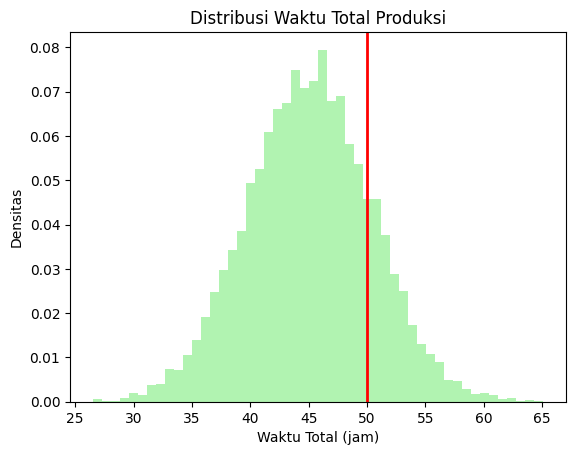

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed untuk reproducibility
np.random.seed(123)

# Parameter
n_sim = 10000
mean_machining = 15  # Rata-rata pemesinan
sd_machining = 3     # Deviasi standar pemesinan
mean_assembly = 20   # Rata-rata perakitan
sd_assembly = 4      # Deviasi standar perakitan
mean_testing = 10    # Rata-rata pengujian
sd_testing = 2       # Deviasi standar pengujian

# Simulasi waktu untuk setiap tahap
machining_time = np.random.normal(mean_machining, sd_machining, n_sim)
assembly_time = np.random.normal(mean_assembly, sd_assembly, n_sim)
testing_time = np.random.normal(mean_testing, sd_testing, n_sim)

# Waktu total produksi
total_time = machining_time + assembly_time + testing_time

# Hitung probabilitas waktu total > 50 jam
prob_above_50 = np.mean(total_time > 50)

# Statistik ringkasan
mean_total = np.mean(total_time)
sd_total = np.std(total_time)

# Output
print(f"Rata-rata waktu total: {mean_total:.2f} jam")
print(f"Deviasi standar waktu total: {sd_total:.2f} jam")
print(f"Probabilitas waktu total > 50 jam: {prob_above_50:.3f}")

# Visualisasi
plt.hist(total_time, bins=50, density=True, color='lightgreen', alpha=0.7)
plt.axvline(x=50, color='red', linewidth=2)
plt.title('Distribusi Waktu Total Produksi')
plt.xlabel('Waktu Total (jam)')
plt.ylabel('Densitas')
plt.show()

-- analisa joseph -- </br>
Jadi dari hasil simulasi kita dapatkan bahwa mean total waktunya 45.07 jam dengan standar deviasi 5.35 jam. jadi bisa dibilang mean dan sd simulasi hampir sama dengan mean dan sd input. </br>
Hasil histogram berbentuk distribusi normal </br>
untuk probabilitas waktu total > 50 didapatkan 0.179 atau 17.9% </br>

Interpretasi output Python

Misalkan hasil simulasi memberikan output berikut:
- Rata-rata waktu total: 45.02 jam
- Deviasi standar waktu total: 5.39 jam
- Probabilitas waktu total > 50 jam: 0.175

### Analisis Hasil:
- **Rata-rata Waktu Total**:  
  Rata-rata waktu total adalah **45.02 jam**, yang konsisten dengan harapan teoritis dari jumlah rata-rata ketiga tahap:  
  $$
  15 + 20 + 10 = 45 \, \text{jam}.
  $$  
  Ini menunjukkan bahwa hasil simulasi sesuai dengan input yang diberikan.

- **Deviasi Standar**:  
  Deviasi standar waktu total adalah **5.39 jam**, mencerminkan variabilitas gabungan dari ketiga tahap. Nilai ini sesuai dengan perhitungan teoritis:  
  $$
  \sqrt{3^2 + 4^2 + 2^2} \approx 5.39.
  $$

- **Probabilitas > 50 Jam**:  
  Probabilitas bahwa waktu produksi melebihi **50 jam** adalah **17.5%**, sama dengan hasil simulasi sebelumnya. Ini menunjukkan bahwa ada risiko **17.5%** jadwal produksi melampaui batas kritis 50 jam.

- **Histogram**:  
  Grafik histogram menunjukkan distribusi waktu total yang mendekati **normal**. Garis merah pada **50 jam** menandai batas kritis. Area di kanan garis tersebut adalah **17.5%**, memberikan gambaran visual tentang risiko keterlambatan.

Relevansi untuk Manufaktur

#### Perencanaan:
- Probabilitas **17.5%** bahwa waktu produksi melebihi **50 jam** dapat digunakan untuk menentukan **buffer waktu** atau mengevaluasi kebutuhan sumber daya tambahan. Misalnya, manajer dapat mempertimbangkan untuk menambah waktu cadangan atau tenaga kerja untuk mengurangi risiko keterlambatan.

#### Analisis Risiko:
- Distribusi waktu total membantu mengidentifikasi skenario terburuk, seperti waktu maksimum dari simulasi. Informasi ini penting untuk mempersiapkan mitigasi risiko dan strategi darurat.

#### Optimasi:
- Jika probabilitas **17.5%** dianggap terlalu tinggi, manajer dapat menyelidiki tahap mana yang paling berkontribusi pada variabilitas. Dalam kasus ini, tahap **perakitan** memiliki deviasi standar tertinggi (**4 jam**), sehingga menjadi area utama untuk perbaikan.

#### Kesimpulan

Simulasi Monte Carlo memberikan wawasan yang berguna untuk perencanaan dan pengambilan keputusan dalam manufaktur:
- Hasil simulasi konsisten dengan harapan teoritis.
- Probabilitas **17.5%** risiko keterlambatan (> 50 jam) dapat digunakan untuk mengidentifikasi buffer waktu dan kebutuhan sumber daya.
- Analisis distribusi waktu total membantu memahami risiko dan mengoptimalkan proses produksi.